#                      1. Exercise          «Portfolio-Exam Part I»                MADS-MMS            Tom Wüsten

# Exercise 1. (Data Acquisition and Initial Data Analysis – 10 points)
 Obtain the dataset [1] from the UCI Machine Learning Repository.
Conduct a brief initial analysis of the raw dataset (henceforth called Dataset 𝐴).

Import libaries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

Import data

In [152]:
df = pd.read_csv('Live_20210128.csv', sep = ",")
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Preprocessing data
1. Check if nan values in data
-   Result: columns1-4 have na Values
2. Check for columns1-4 if all values are na
-   all values in Columns1-4 are nan values
-   so we can drop this 4 columns 

In [153]:
nan_values_columns = df.isna().any()
print (nan_values_columns)
result_na_columns = df[:-4].isna().any()
print(result_na_columns)
df.drop(columns=df.columns[-4:],axis=1,inplace=True)
df.head()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool
status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


1.1 (2 points) What do the rows of the dataset represent?

In [154]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Get unique post types

In [155]:
dis = df['status_type'].value_counts()
dis

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [156]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Every row represent a post. This post can be a video, photo, link or a status. Every post got various attributes like status_published, num_reactions or num_comments

1.2 (2 points) How many different instances does the dataset contain?

The dataset contains 7050 instances.

In [157]:
# maybe change because some post are the same / wait of the answer of valentin
unique_instances = df['status_id'].unique()
number_of_rows = unique_instances.shape[0]
print('Number of Rows : ', number_of_rows)

Number of Rows :  7050


1.3 (2 points) How many attributes (columns) are in the dataset?

The dataset contains 12 attributes. 

In [158]:
number_of_columns = df.shape[1]
print('Number of Columns : ', number_of_columns)

Number of Columns :  12


1.4 (4 points) What is the standard deviation of the feature num_likes?

The Standard deviation of the feature num likes is 449.472

In [159]:
sd_num_likes = df['num_likes'].std()
print('The Standard deviation of the feature num likes is:',sd_num_likes )

The Standard deviation of the feature num likes is: 449.47235705614156


# Exercise 2. (k-Means Clustering on the Plain Data – 40 points)
Begin the analysis using the k-means approach.

2.1 (5 points) Which features of the dataset do not suggest themselves as features analysis? For each of these features, brieﬂy state why you exclude them.

The status_id has no value because it's an id and every instances has a different id. The status_type is a categorical feature that describes the kind of the post. The k-means approach doesn't allow categorical features. It would be possible to transform this feature via one hot encoding. Then we would have 3 additional features. But in this categorical format we can't use the status_type. 
The status_published describes the time and day when the post was posted. This time format is not usable for the k-means approach. It would be possible to change the type of the feature via feature engineering approaches.
In summary the first three columns status_id, status_type and status_published aren't interesting for the k-means clustering.

2.2 (15 points) For the next tasks, restrict Dataset 𝐴 to the following features: num_reactions,
num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas.
We will call this Dataset 𝐵.
On 𝐵, compute k-means clusterings of the dataset using different choices for 𝑘 : 2, 3, . . . , 10.
Use a seed of 1 to make the experiments reproducible. For each 𝑘 compute the silhouette
coefﬁcient and plot it against 𝑘 in a diagram. Interpret the diagram!

Create Dataset B as df_b

In [160]:
df_b = df.iloc[:,3:10]
df_unscaled = df.iloc[:,3:10]

In [161]:
df_b.head().to_latex(index=False)

'\\begin{tabular}{rrrrrrr}\n\\toprule\n num\\_reactions &  num\\_comments &  num\\_shares &  num\\_likes &  num\\_loves &  num\\_wows &  num\\_hahas \\\\\n\\midrule\n           529 &           512 &         262 &        432 &         92 &         3 &          1 \\\\\n           150 &             0 &           0 &        150 &          0 &         0 &          0 \\\\\n           227 &           236 &          57 &        204 &         21 &         1 &          1 \\\\\n           111 &             0 &           0 &        111 &          0 &         0 &          0 \\\\\n           213 &             0 &           0 &        204 &          9 &         0 &          0 \\\\\n\\bottomrule\n\\end{tabular}\n'

Function to calclulate the silhouette score

In [162]:
def calculate_silhouette_score(k_min,k_max,df):
    silhouettes=[]
    i = k_min
    for i in range(k_min,k_max+1):   
        kmeans=KMeans(n_clusters=i, random_state=1) # <- by default, this runs k-means++, starting over 10 times, reporting the best result
        y_pred = kmeans.fit_predict(df)
        print(silhouette_score(df,y_pred))
        silhouettes.append(silhouette_score(df,y_pred))
    return kmeans,silhouettes

function for plotting the silhouette score against k

In [163]:
def plot_silhouette_score(k_min,k_max,silhouette, exercise_nr):
    plt.xlabel('k')
    plt.ylabel('Silhouette Coefﬁcient')
    plt.plot(range(k_min,k_max+1), silhouette)
    plt.legend()
    plt.savefig(f'{exercise_nr}.jpg') 
    return plt.show()

0.8721940910132095
0.8121487911423703
0.8175756789346555
0.7851718243089241
0.7712315696864963
0.7613553246277736
0.7604486291029605
0.6572811168153347
0.68194878189278


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


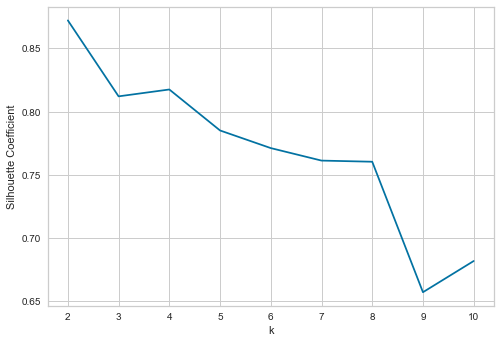

In [164]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_b)
plot_silhouette_score(k_min,k_max,silhouette, '2.2')

## Observations
1. We might have expected k=4 to yield the best results, because the dataset has 4 different kinds of status_types
2. We see that k=2 has the highest silhouette coefficient, but also k=3 & k=4 have a high silhouette coefficient
3. We also see that the silhouette coefficient till k= 8 is above 0.7. In the lecture we defined that sc > 0.7 means that we have a strong structure

2.3 (10 points) Create a silhouette plot for the 𝑘 with the highest silhouette coefﬁcient in the
previous experiment. Interpret the diagram!

In [165]:
def visualize_silhouette_score(kmeans,color,X):
    visualizer = SilhouetteVisualizer(kmeans, colors=color, is_fitted=True)
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.finalize()
    print(visualizer.silhouette_samples_)
    print(f'Silhoutte score: {visualizer.silhouette_score_}')
    visualizer.poof(outpath="3.5_sil.jpg")
    return visualizer.show()        # Finalize and render the figure

0.8721940910132095
KMeans(n_clusters=2, random_state=1)


C:\Users\wuest\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[0.81854377 0.92372597 0.90085869 ... 0.92770662 0.89343311 0.93018485]
Silhoutte score: 0.8721940910132095


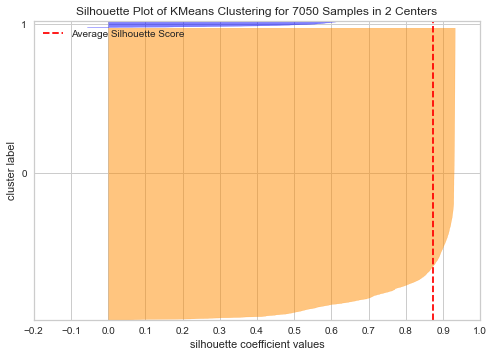

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [166]:
colors=['darkorange', 'blue']
kmeans,silhouette = calculate_silhouette_score(2,2,df_b)
print(kmeans)
visualize_silhouette_score(kmeans,colors,df_b)

In [167]:
print(kmeans)
labels_2=kmeans.predict(df_b)
test['cluster2'] = labels_2
distribution = test['cluster2'].value_counts()
print(distribution)
print(distribution/df_b.shape[0])

KMeans(n_clusters=2, random_state=1)
0    6909
1     141
Name: cluster2, dtype: int64
0    0.98
1    0.02
Name: cluster2, dtype: float64


In [168]:
df_b

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,529,512,262,432,92,3,1
1,150,0,0,150,0,0,0
2,227,236,57,204,21,1,1
3,111,0,0,111,0,0,0
4,213,0,0,204,9,0,0
...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0
7046,16,0,0,14,1,0,1
7047,2,0,0,1,1,0,0
7048,351,12,22,349,2,0,0


## Observations
1. The highest silhouette score was for the k = 2.
2. The plot shows that the majority of the data points are in the cluster 0. This cluster has 6909 datapoints detected. The cluster 1 isn't that good visible because it has only 2% of the datapoints in that cluster.
3. It is also goo visible that sol


2.4. (10 points) For the same 𝑘, create a plot of the data where you use only the two features
num_reactions and num_likes as the axes. Use color to distinguish instances from
different clusters. Also highlight the cluster centroids of the k-means clustering. Interpret the
diagram, considering only the above two features. Is there a clear clustering structure visible?

In [169]:
df_b

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,529,512,262,432,92,3,1
1,150,0,0,150,0,0,0
2,227,236,57,204,21,1,1
3,111,0,0,111,0,0,0
4,213,0,0,204,9,0,0
...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0
7046,16,0,0,14,1,0,1
7047,2,0,0,1,1,0,0
7048,351,12,22,349,2,0,0


In [170]:
def plot_clusters_with_centers(kmeans, X, index_x, index_y,exercise_nr):
    plt.figure(figsize=(8, 8))
    y_pred = kmeans.fit_predict(X)
    print(len(np.unique(y_pred)))
    for i in range(0,len(np.unique(y_pred))):
        plt.scatter(X.iloc[y_pred==i, index_x], X.iloc[y_pred==i, index_y], c=colors[i], label=i, marker = '.')

    plt.xlabel("Num_reactions")
    plt.ylabel("Num_likes")
    plt.scatter(
        kmeans.cluster_centers_[:, index_x], 
        kmeans.cluster_centers_[:, index_y],
        s=350, marker='*', c='green', edgecolor='black'
    )
    plt.legend()
    plt.savefig(f'{exercise_nr}.jpg')  

0.8721940910132095
KMeans(n_clusters=2, random_state=1)
2


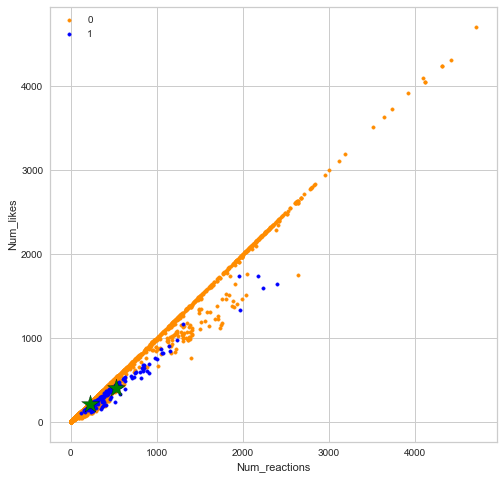

In [171]:
colors=['darkorange', 'blue']
kmeans,silhouette = calculate_silhouette_score(2,2,df_b)
print(kmeans)
plot_clusters_with_centers(kmeans, df_b, 0, 3, '2.4')

#kmeans

## Observations
1. We see that the number of Likes is growing linear with the number of reactions.
2. Regards to Facebook post that makes total sense, because if a post has more likes in genral more people see that post and react to this
3. The clustering structure is not clear visible.


# Exercise 3. (Scaling and Feature Selection – 50 points)
In these next experiments, we preprocess and restrict Dataset 𝐵 further through scaling and using variance as a criterion for feature selection. Particularly, use the class
sklearn.feature_selection.VarianceThreshold.

3.1 (10 points) Describe in your own words, what the class VarianceThreshold is used for and
explain why looking at a feature’s variance is meaningful.

The class VarianceThreshold drops column where the Variance is under a specific choosen threshold. Variance shows the variability in a distribution. In context of features it shows us how much spread has this feature. If it has a variance of 0 then the information is not meaningful. But if the variance is high then those feature provides more information.  
Variance Theshold contains to the field of feature selection. Feature selection describes the process of choosing the most important features while trying to retain as much information as possible. 

3.2 (5 points) The features of the dataset are in different ranges. To be able to compare by variance
we should scale the data ﬁrst. Which is the better choice for the variance threshold method
Min-Max-Scaling or the Standard-Scaler (z-score transformation)? Explain your answer.


It's important to take the MinMaxScaler becaue we want to compare the coulmns later with the VarianceThreshold. If we would take the Standard-Scaler we did alredy use variance. Also the value would be 


31

StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. For e.g. an Employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 10000-80000.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model.


3.3 (10 points) Use Min-Max-Scaling on Dataset 𝐵 to yield Dataset 𝐶 and rerun the above
experiments on 𝐶 (k-means clusterings for 𝑘 “2, 3, . . . , 10, silhouette plot for the best 𝑘, plot
of clustered data and centroids). How does that compare to the previous experiments?

In [172]:
df_c

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000
...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000


In [173]:
scaler = MinMaxScaler()
scaler.fit(df_b)
df_c = pd.DataFrame()
df_c[df_b.columns] = scaler.fit_transform(df_b[df_b.columns])


0.8215675045467138
0.8259602702160408
0.6564005251551854
0.7084496391838202
0.6349040822746326
0.6499487399180348
0.6558037694379429
0.657065771419574
0.6597885722289903


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


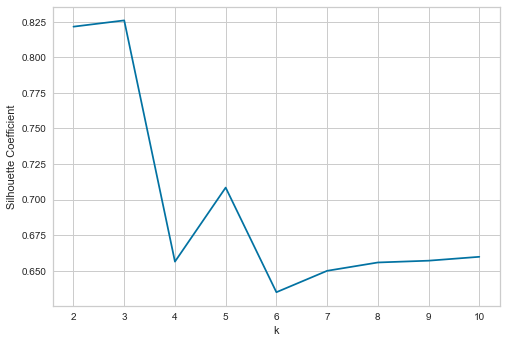

In [174]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_c)
plot_silhouette_score(k_min,k_max,silhouette, '3.3')


0.8259602702160408
KMeans(n_clusters=3, random_state=1)


C:\Users\wuest\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[0.50501246 0.896767   0.85597874 ... 0.91829236 0.79301183 0.92274632]
Silhoutte score: 0.8259602702160408


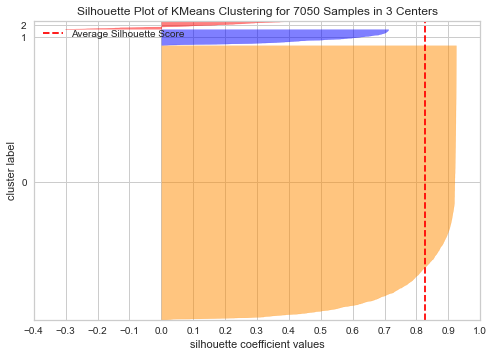

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [175]:
colors=['darkorange', 'blue', 'red']
kmeans,silhouette = calculate_silhouette_score(3,3,df_c)
print(kmeans)
visualize_silhouette_score(kmeans,colors,df_c)

## Observations
1. We see that for k=2 and k=3 are the highest silhouette coefficent. Both are sc> 0.75 that means that they have a good structure.
2. In Comparison to the unscaled data the silhoette coeffiecent drops at k=4 and is under sc< 0.75. The rest of the k have also a lower sc< 0.75. In the unscaled data k=2 - k= 8 had a sc< 0.75.
3. Also k = 3 has now the highest sc score and will be used for the next diagram.

0.8259602702160408
3


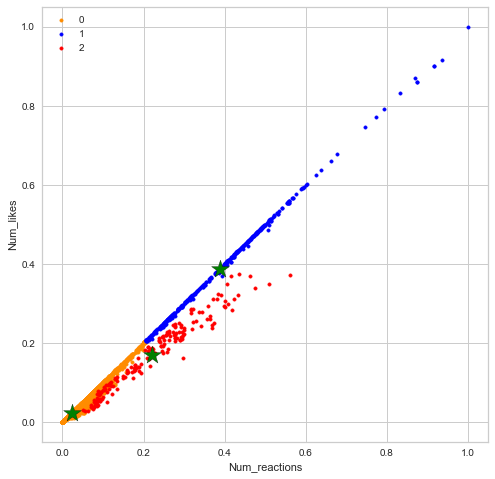

In [176]:
colors=['darkorange', 'blue', 'red']
kmeans,silhouette = calculate_silhouette_score(3,3,df_c)
plot_clusters_with_centers(kmeans, df_c, 0, 3, '3.3')


0.8215675045467138
2


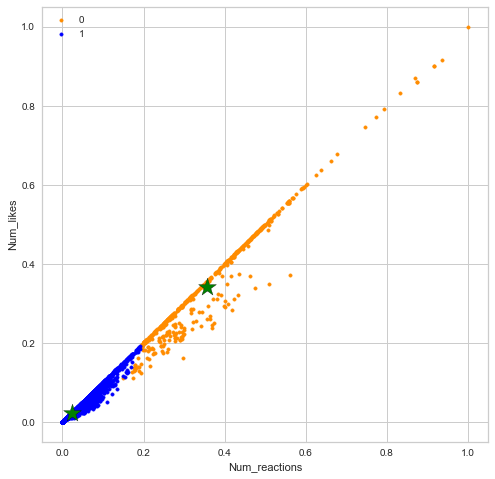

In [177]:
colors=['darkorange', 'blue', 'red']
kmeans,silhouette = calculate_silhouette_score(2,2,df_c)
plot_clusters_with_centers(kmeans, df_c, 0, 3, '3.3_2k')


In [178]:
labels_3 = kmeans.predict(df_c)
test['cluster3'] = labels_3
distribution = test['cluster3'].value_counts()
print(distribution)
print(distribution/df_b.shape[0])

1    6538
0     512
Name: cluster3, dtype: int64
1    0.927376
0    0.072624
Name: cluster3, dtype: float64


3.4 (10 points) Use the variance threshold method for feature selection on the scaled data to restrict
the features further. Set the variance threshold to 0.005. Which features does the resulting
dataset (Dataset 𝐷) include, what is their variance (computed on the scaled features)?

In [179]:
df_c.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000


In [180]:
selector = VarianceThreshold(threshold=0.005)
df_d  = selector.fit_transform(df_c)
print(selector.get_support())
df_d = pd.DataFrame(df_d,columns=["num_reactions", "num_likes"]) 
df_d
# calculate variance
print("The variance of the feature num_reactions is: " + str(df_c.loc[:,"num_reactions"].var()))
print("The variance of the feature num_likes is: " + str(df_c.loc[:,"num_likes"].var()))

[ True False False  True False False False]
The variance of the feature num_reactions is: 0.009647548318501549
The variance of the feature num_likes is: 0.009106765645557114


After computing the variance threshold we drop 5 columns.  The command "selector.get_support()" shows which feature are true for the variance threshold. Only the columns num_reactions and num_likes are meaningful.

3.5 (5 points) Repeat the experiments from above on Dataset 𝐷 (k-means clusterings for 𝑘 “
2, 3, . . . , 10, silhouette plot for the best 𝑘, plot of clustered data and centroids). Compare the
outcome to the previous experiments.

0.8740627854592383
0.8304048901564636
0.6968215945642428
0.697109285223454
0.6794265796079899
0.6764981699506525
0.6628434488399039
0.6497162530678282
0.6436322168208527


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


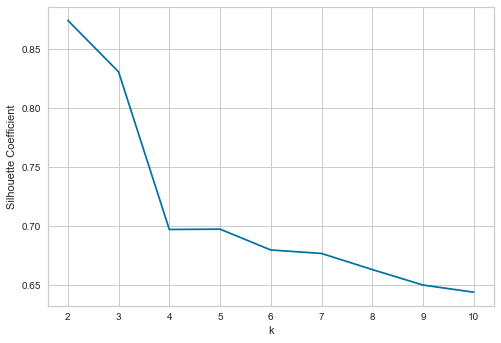

In [181]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_d)
plot_silhouette_score(k_min,k_max,silhouette, '3.5')

0.8740627854592383
KMeans(n_clusters=2, random_state=1)


C:\Users\wuest\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[0.6791822  0.91874901 0.8899867  ... 0.93282263 0.80107856 0.93868537]
Silhoutte score: 0.8740627854592383


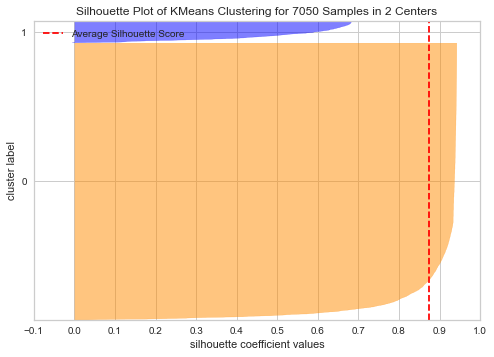

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [182]:
colors=['darkorange', 'blue', 'red']
kmeans,silhouette = calculate_silhouette_score(2,2,df_d)
print(kmeans)
visualize_silhouette_score(kmeans,colors,df_d)

0.8740627854592383
2


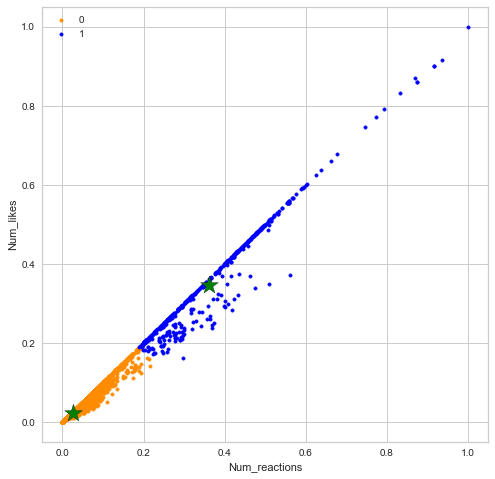

In [183]:
kmeans,silhouette = calculate_silhouette_score(2,2,df_d)
plot_clusters_with_centers(kmeans, df_d, 0, 1, '3.5_centroid')


In [184]:
labels_5 = kmeans.predict(df_d)
test['cluster2'] = labels_5
distribution = test['cluster2'].value_counts()
print(distribution)
print(distribution/df_d.shape[0])

0    6554
1     496
Name: cluster2, dtype: int64
0    0.929645
1    0.070355
Name: cluster2, dtype: float64


## Observations
1. We see that for k=2 and k=3 are the highest silhouette coefficent. Both are sc> 0.75 that means that they have a good structure.
2. In Comparison to the unscaled data the silhoette coeffiecent drops at k=4 and is under sc< 0.75. The rest of the k have also a lower sc< 0.75. In the unscaled data k=2 - k= 8 had a sc< 0.75.
3. Also k = 3 has now the highest sc score and will be used for the next diagram.

3.6. (10 points) Compare the feature distributions over the clusters for features num_reactions,
num_likes, and num_shares. Use violin plots for the original data (the unscaled values)
and interpret your results.

In [185]:
df_unscaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,529,512,262,432,92,3,1
1,150,0,0,150,0,0,0
2,227,236,57,204,21,1,1
3,111,0,0,111,0,0,0
4,213,0,0,204,9,0,0
...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0
7046,16,0,0,14,1,0,1
7047,2,0,0,1,1,0,0
7048,351,12,22,349,2,0,0


In [186]:
kmeans,silhouette = calculate_silhouette_score(2,2,df_d)
#plot_clusters_with_centers(kmeans, df_unscaled, 0, 3, '3.6','3.6')
labels_4 = kmeans.predict(df_d)
df_unscaled['cluster2'] = labels_4
df_unscaled[["num_reactions","num_likes", "num_shares", "cluster2"]]
df_unscaled.groupby('cluster2').aggregate(['min', 'mean', 'max'])

0.8740627854592383


num_reactions                    num_comments                     \
                   min         mean   max          min        mean    max   
cluster2                                                                    
0                    0   118.791883  1012            0  209.666005  20990   
1                  893  1701.137097  4710            0  418.465726   9452   

         num_shares                   num_likes  ...       num_loves  \
                min        mean   max       min  ...   max       min   
cluster2                                         ...                   
0                 0   32.684010  1636         0  ...   880         0   
1                 0  136.991935  3424       765  ...  4710         0   

                         num_wows                num_hahas                 
               mean  max      min      mean  max       min      mean  max  
cluster2                                                                   
0          9.862069  276        0  0.648306  111         0  0.543943  102  
1         50.606855  657        0  9.760081  278         0  2.711694  157  

[2 rows x 21 columns]

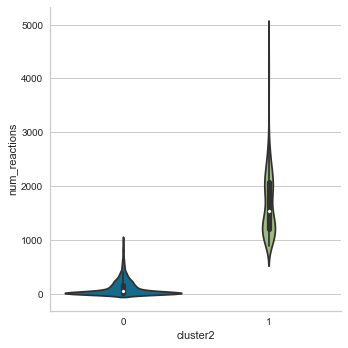

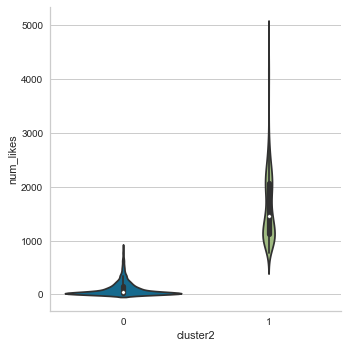

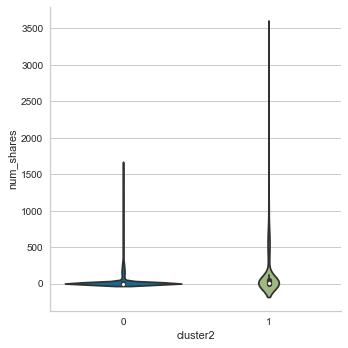

In [187]:
sns.catplot(x='cluster2', y='num_reactions',
                data=df_unscaled, kind="violin");
plt.savefig('num_reactions.jpg')
sns.catplot(x='cluster2', y='num_likes',
                data=df_unscaled, kind="violin");
plt.savefig('num_likes.jpg')
sns.catplot(x='cluster2', y='num_shares',
                data=df_unscaled, kind="violin");
plt.savefig('num_shares.jpg')
                